# Story: DataByteSun: RefreshCo's Path to Success

## Introduction

DataByteSun had made its mark as a leading technology consultancy, known for its expertise in leveraging data to drive impactful digital strategies for businesses. Their long-standing client, RefreshCo—a popular beverage brand—faced a new challenge. Despite substantial advertising investments, their sales had reached a particular level and now the sales are not growing. Saira, the CEO of RefreshCo, turned to DataByteSun for an innovative, data-driven approach to reignite their marketing effectiveness and inspire growth.

## The Challenge

Saira was particularly concerned about their TV advertising efforts. She believed that TV ads played a crucial role in driving sales but lacked the necessary data to substantiate this belief.

=> To address this issue, Saira engaged DataByteSun to analyze the impact of their advertising budget, specifically focusing on the relationship between television advertising and sales performance.

Dataset: Advertising Sales Dataset<br>
Link: https://www.kaggle.com/datasets/ashydv/advertising-dataset

## The Investigation

As a data analyst at DataByteSun, we took on the challenge. We gathered the historical advertising data for RefreshCo, which included expenditures on TV, radio, and newspapers, along with the corresponding sales figures.

- The dataset consisted of the following columns:
    - TV: Amount spent on TV advertising (Budget for TV Advertisements in 1000 dollers)
    - Radio: Amount spent on radio advertising (Budget for Radio Advertisements in 1000 dollers)
    - Newspaper: Amount spent on newspaper advertising (Budget for Newspaper Advertisements in 1000 dollers)
    - Sales: Total sales generated (Sales Revenue in Million dollers)

## Data Understanding

In [1]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

# import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# import the data
data = pd.read_csv('advertising.csv')

In [3]:
# let's look at the head of the data
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# let's look at the shape of the data
data.shape

(200, 4)

There are 200 rows and 4 columns in the data.

In [5]:
# let's look at the columns of the data
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

The four columns in the dataset are 'TV', 'Radio', 'Newspaper' and 'Sales'.
- 'TV' column represents the money spent on TV marketing.
- 'Radio' column represents the money spent on radio marketing.
- 'Newspaper' column represents the money spent on newspaper marketing.

In [6]:
# let's look at the data types of the data
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

The data type of all the columns in the data is float64.

In [7]:
# let's look at the null values in the data
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no null values in the data.

In [8]:
# let's look at the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
# let's look at the statistical summary of the data
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Statistical summary is shown for the numeric columns only. The money spent on TV marketing is significantly higher as compared to the money spent on radio marketing and newspaper marketing.
<br>
<br>
We can also see that the minimum value for radio is 0.

In [10]:
# let's look at the number of records for which the value of radio is 0
data[data['Radio'] == 0]

,TV,Radio,Newspaper,Sales
127,80.2,0.0,9.2,11.9


Since there is only 1 record with 0 value, we can safely ignore it and we don't need to preprocess this further.

In [11]:
# let's look at the duplicate values in the data
data.duplicated().sum()

0

There are no duplicated values in the data.

## Data Visualization

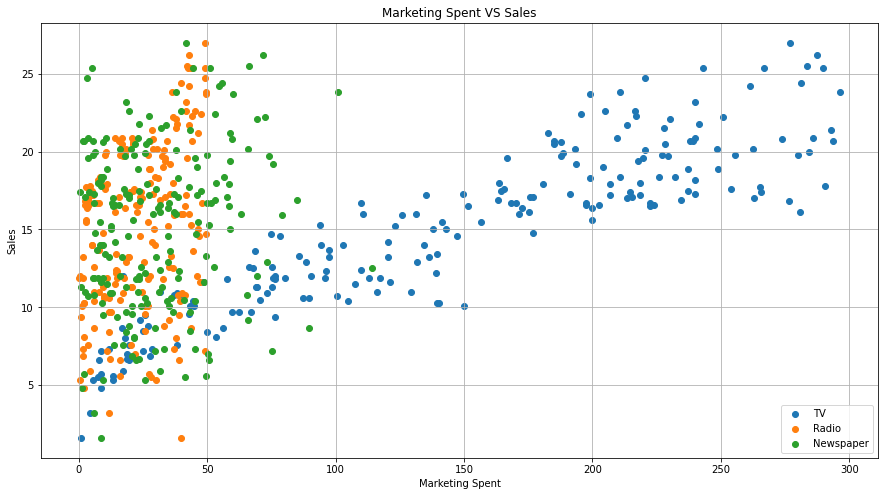

In [12]:
# let's look at the scatter plot of all variables with Sales in single graph
plt.figure(figsize=[15,8])
plt.scatter(x = data['TV'], y = data['Sales'], label = 'TV')
plt.scatter(x = data['Radio'], y = data['Sales'], label = 'Radio')
plt.scatter(x = data['Newspaper'], y = data['Sales'], label = 'Newspaper')
plt.title('Marketing Spent VS Sales')
plt.xlabel('Marketing Spent')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

We have plotted the marketing spent on TV, Radio and Newspaper against Sales. From the above scatter plot, we can clearly see that the TV and Sales are linearly correlated, so the 1st assumption of the simple linear regression is validated. There is a positive correlation between the TV marketing and Sales.

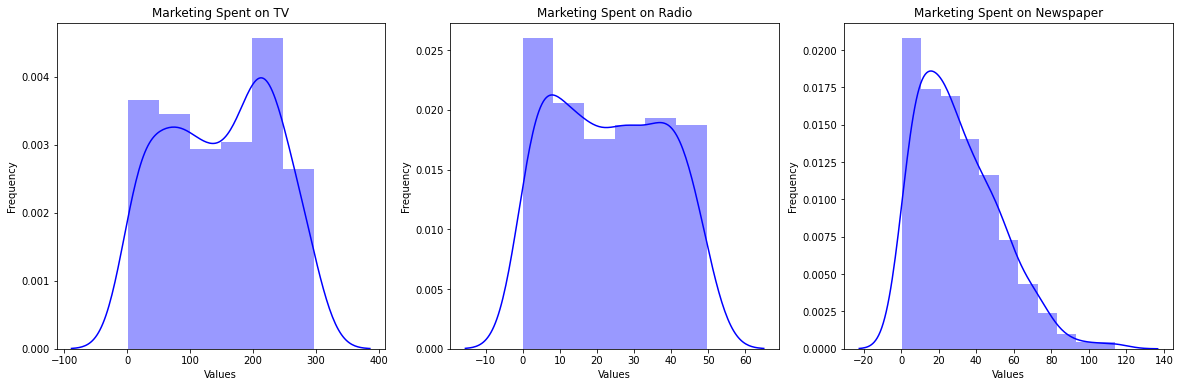

In [13]:
# Let's look at the distribution plot of all variables against Sales
plt.figure(figsize=[20,6])
for i, column in enumerate(data[['TV','Radio','Newspaper']], 1):
    plt.subplot(1, 3, i)
    sns.distplot(data[column], color = 'blue')
    plt.title(f'Marketing Spent on {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

From the distribution plot, we can see the distribution. The distribution of 'Newspaper' variable is left skewed.
<br>
<br>
We can also see the histogram in the distribution plot. Histogram basically indicates the frequency.

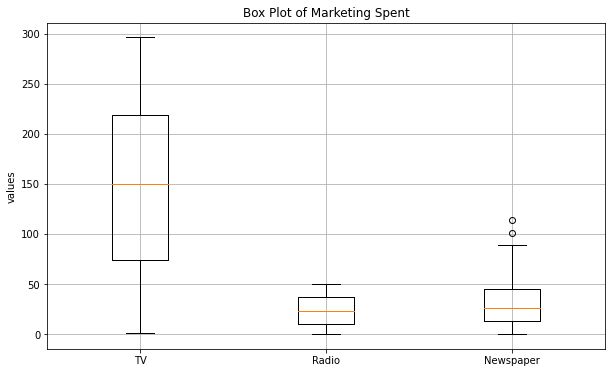

In [14]:
# Let's look at the boxplot of 'TV', 'Radio' and 'Newspaper'
plt.figure(figsize=[10, 6])
plt.boxplot(data[['TV', 'Radio', 'Newspaper']], labels = ['TV', 'Radio', 'Newspaper'])
plt.title('Box Plot of Marketing Spent')
plt.ylabel('values')
plt.grid()
plt.show()

From the boxplot, it is evident that there are outliers present in the 'Newspaper' variable. But, since we're interested in the 'TV' variable, we're not going to treat outliers in the 'Newspaper' variable as of now.

In [15]:
# let's look at the correlations
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


We can see the correlation between all the variables. The correlation between TV and Sales is 0.9. It indicates that the TV and Sales are highly correlated.

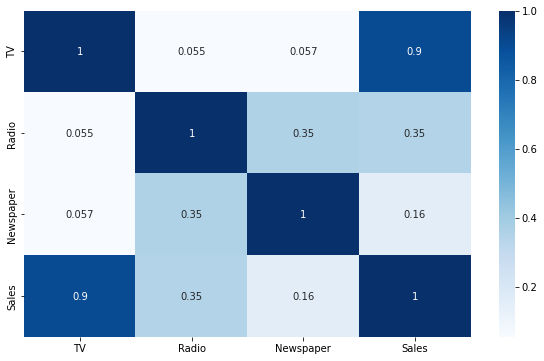

In [16]:
# Let's plot these correlations using heatmap
plt.figure(figsize=[10, 6])
sns.heatmap(data.corr(), annot=True, cmap = 'Blues')
plt.show()

We have used the blue color shade for the heatmap. The light blue color indicates the lower correlation whereas dark blue color indicates the higher correlation.

## Model Building

Since data meets most of the necessary conditions for linear regression, we can proceed with the model building.

In [17]:
# define X and y
X = data[['TV']]    # independent variable
y = data[['Sales']] # dependent variable

In [18]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# build the model
model = LinearRegression()   # creates a linear regression object
model.fit(X_train, y_train)  # learns the coefficient

LinearRegression()

In [20]:
# make predictions on the train set
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [21]:
# let's look at the coefficients of the model
print(f'The intercept of the model is {round(model.intercept_[0], 2)}')
print(f'The slope of the model is {round(model.coef_[0][0], 2)}')

The intercept of the model is 7.01
The slope of the model is 0.06


## Model Interpretation
### - Model Interpretation
<div class="alert alert-block alert-info">
<b><span style="font-family: 'Courier New'; font-size: 20px;">the equation of the line: y = 7.01 + 0.06 x TV</span></b></div>

Which means:
- If no budget is allocated to TV ads, sales are 7.01 units.
- For each unit increase in the TV budget, sales increases by 0.06 units.

In [22]:
# evaluate the model
print(f'The R-squared of the train set is {round(r2_score(y_train, y_train_pred), 2)}')
print(f'The R-squared of the test set is {round(r2_score(y_test, y_test_pred), 2)}')
print(f'The mean squared error of the train set is {round(mean_squared_error(y_train, y_train_pred), 2)}')
print(f'The mean squared error of the test set is {round(mean_squared_error(y_test, y_test_pred), 2)}')

The R-squared of the train set is 0.81
The R-squared of the test set is 0.8
The mean squared error of the train set is 5.0
The mean squared error of the test set is 6.1


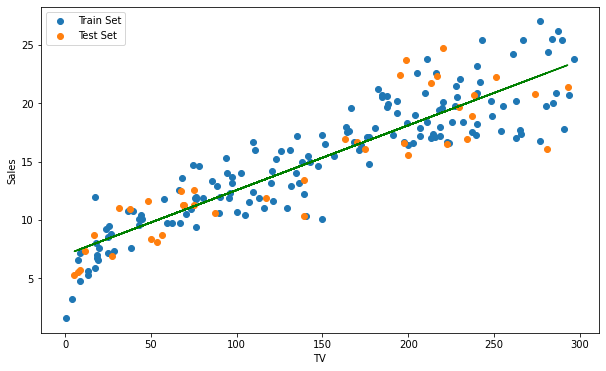

In [23]:
# let's visualize the model on the overall data

plt.figure(figsize=[10, 6])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.scatter(X_train, y_train, label = 'Train Set')
plt.scatter(X_test, y_test, label = 'Test Set')
plt.plot(X_test, y_test_pred, 'g')
plt.legend()
plt.show()

## Residual Analysis

Residuals are basically error terms. It's the difference between the actual y value and predicted y value.

In [24]:
# residuals
res = y_train - y_train_pred

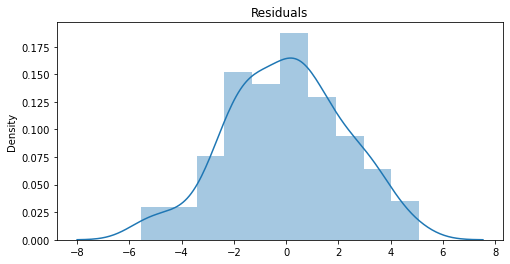

In [25]:
# let's plot the residuals
plt.figure(figsize=[8,4])
sns.distplot(res)
plt.title('Residuals')
plt.show()

We can see the bell shaped curve for the distribution of error terms. It shows that the error terms are normally distributed so the 2nd assumption of the simple linear regression is validated.

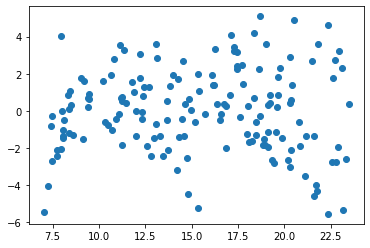

In [26]:
# scatter plot of the residuals
plt.scatter(y_train_pred, res)
plt.show()

From the scatter plot of residuals, it is clear that the error terms are independent of each other. This validates the 3rd assumption of the simple linear regression.
<br>
<br>
The variance of the error terms is not changing. It means that the error terms have constant variance and this validates the 4th assumption of the simple linear regression.

## Recommendations

Based on our comprehensive analysis, DataByteSun recommended RefreshCo to increase its television advertising budget. We provided Saira with substantial data to support this recommendation, demonstrating a clear relationship between money spent on TV marketing and sales growth.

## Conclusion

With data-driven insights in hand, Saira and her team felt empowered to adjust their advertising strategy. Following the implementation of your recommendations, RefreshCo experienced a significant uptick in sales over the following months. The partnership with DataByteSun flourished, leading to further successful collaborations in the competitive beverage market.

<div class="alert alert-block alert-success"><b>END</b></div>